# OCR with Python and Tesseract

# Text recognition in images

## Installing Tesseract

- Documentation: https://pypi.org/project/pytesseract/

In [29]:
# !sudo apt install tesseract-ocr
# !brew install tesseract
# !pip install pytesseract

## Importing the libraries

In [6]:
import pytesseract
import numpy as np
import cv2 
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-bright')

In [7]:
print(pytesseract.__version__)


0.3.10


## Reading the image

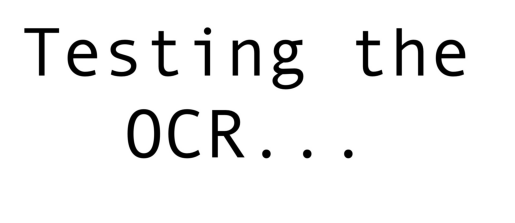

In [32]:
img = cv2.imread('Sources/Images/test01.jpg')
plt.axis(False)
plt.imshow(img)

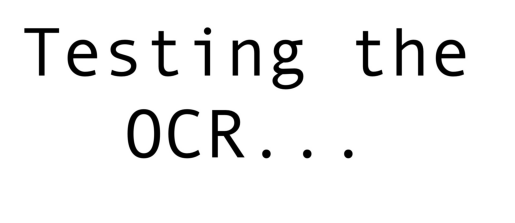

In [33]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis(False)
plt.imshow(rgb)

In [34]:
text = pytesseract.image_to_string(rgb)

In [35]:
print(text)

Testing the
OCR...


## Support for other languages

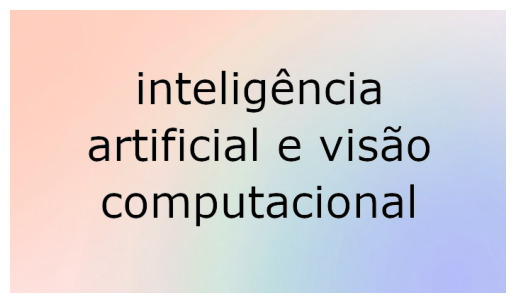

In [36]:
img = cv2.imread('Sources/Images/test02-02.jpg')
plt.axis(False)
plt.imshow(img)

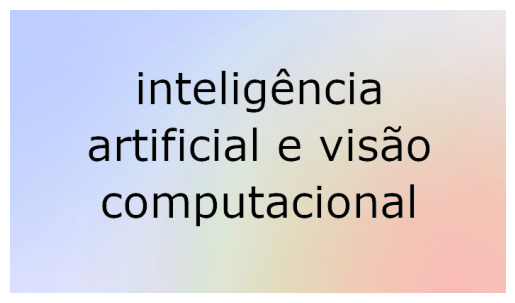

In [37]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis(False)
plt.imshow(rgb)

In [38]:
text = pytesseract.image_to_string(rgb)
print(text)

inteligéncia
artificial e visao
computacional


In [39]:
!tesseract --list-langs

List of available languages in "/opt/homebrew/share/tessdata/" (3):
eng
osd
snum


In [40]:
# !apt-get install tesseract-ocr-por # Portuguese
!brew install tesseract-ocr-por # Portuguese

==> Searching for similarly named formulae and casks...
==> Formulae
tesseract ✔

To install tesseract ✔, run:
  brew install tesseract ✔


In [41]:
!tesseract --list-langs

List of available languages in "/opt/homebrew/share/tessdata/" (3):
eng
osd
snum


In [42]:
# text = pytesseract.image_to_string(rgb, lang='por')
# print(text)

In [43]:
!mkdir tessdata

mkdir: tessdata: File exists


In [15]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata

--2024-06-21 15:42:36--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2024-06-21 15:42:37--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15336931 (15M) [application/octet-stream]
Saving to: ‘./tessdata/por.traineddata’

./tessdata/por.trai 100%[===================>]  14.63M  5.59MB/s    in 2.6s    

2024-06-21 15:42:41 (5.59 MB/s) - ‘./tessdata/por.traineddata’ saved [15336931/15336931

In [16]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

NameError: name 'rgb' is not defined

In [46]:
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/raw/main/eng.traineddata

--2024-06-18 08:54:56--  https://github.com/tesseract-ocr/tessdata/raw/main/eng.traineddata
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/eng.traineddata [following]
--2024-06-18 08:54:57--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/eng.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23466654 (22M) [application/octet-stream]
Saving to: ‘./tessdata/eng.traineddata’

./tessdata/eng.trai 100%[===================>]  22.38M  5.47MB/s    in 4.1s    

2024-06-18 08:55:01 (5.46 MB/s) - ‘./tessdata/eng.traineddata’ saved [23466654/23466654

In [47]:
!ls tessdata/

eng.traineddata por.traineddata


## Parameters

### Page segmentation modes (PSM)

In [48]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


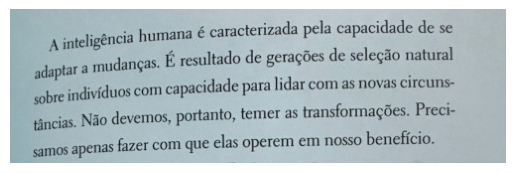

In [49]:
img = cv2.imread('Sources/Images/page-book.jpg')
plt.axis(False)
plt.imshow(img)

In [50]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

inteligência
artificial e visão
computacional


In [51]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

inteligência
artificial e visão
computacional


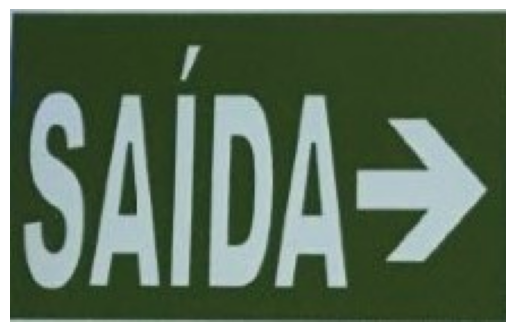

In [52]:
img = cv2.imread('Sources/Images/exit.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis(False)
plt.imshow(img)

In [53]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

SAÍDA>


### Page orientation

In [54]:
from PIL import Image
import matplotlib.pyplot as plt

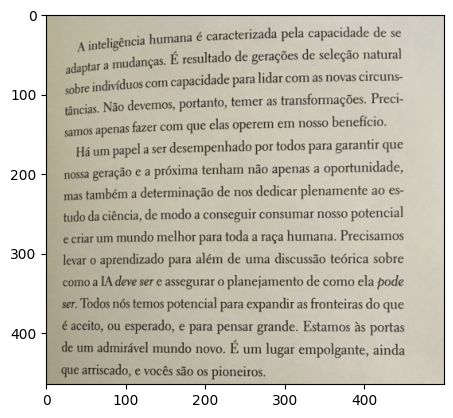

In [55]:
img = Image.open('Sources/Images/book01.jpg')
plt.imshow(img);

In [56]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.66
Script: Latin
Script confidence: 13.33


# Selection of texts



In [19]:
from pytesseract import Output

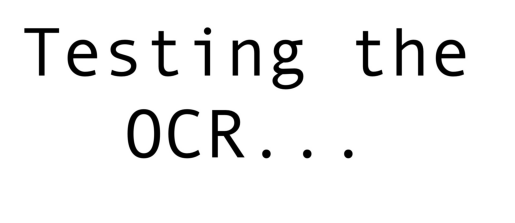

In [58]:
img = cv2.imread('Sources/Images/test01.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis(False)
plt.imshow(img)

In [59]:
config_tesseract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang='eng', output_type=Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 0, 1, 2],
 'left': [0, 54, 54, 54, 54, 1298, 441, 441, 1034],
 'top': [0, 69, 69, 69, 69, 72, 375, 370, 526],
 'width': [1859, 1652, 1652, 1652, 1046, 408, 843, 514, 240],
 'height': [763, 489, 489, 231, 231, 180, 183, 239, 32],
 'conf': [-1, -1, -1, -1, 86, 92, -1, 88, 92],
 'text': ['', '', '', '', 'Testing', 'the', '', 'OCR.', '..']}

- block_num = Current block number. When Tesseract performs the detections, it divides the image into several regions, which can vary according to the PSM parameters and also other criteria of the algorithm. Each block is a region

- conf = prediction confidence (from 0 to 100. -1 means no text was recognized)

- height = height of detected block of text (bounding box)

- left = x coordinate where the bounding box starts

- level = the level corresponds to the category of the detected block. There are 5 possible values:
  1. page
  2. block
  3. paragraph
  4. line
  5. word

Therefore, if 5 is returned, it means that the detected block is text, if it was 4, it means that a line was detected

- line_num = line number (starts from 0)

- page_num = the index of the page where the item was detected

- text = the recognition result

- top = y-coordinate where the bounding box starts

- width = width of the current detected text block

- word_num = word number (index) within the current block

In [60]:
result['text'], len(result['text'])

(['', '', '', '', 'Testing', 'the', '', 'OCR.', '..'], 9)

In [24]:
def bouding_box(result, img, i, color = (255,100,0)):
  x = result['left'][i]
  y = result['top'][i]
  w = result['width'][i]
  h = result['height'][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

  return x, y, img

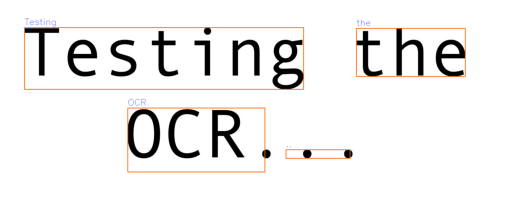

In [62]:
min_confidence = 40
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
  #print(i)
  confidence = int(result['conf'][i])
  #print(confidence)
  if confidence > min_confidence:
    #print(confidence)
    x, y, img = bouding_box(result, img_copy, i)
    #print(x,y)
    text = result['text'][i]
    cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
plt.axis(False)
plt.imshow(img_copy)

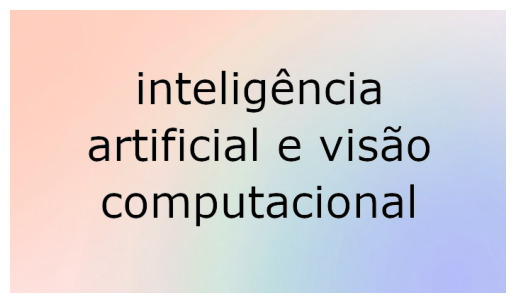

In [63]:
img = cv2.imread('Sources/Images/test02-02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis(False)
plt.imshow(img)

In [64]:
config_tesseract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang = 'por', output_type = Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 4, 5, 5, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 1],
 'left': [0, 111, 111, 182, 182, 111, 111, 380, 437, 130, 130],
 'top': [0, 84, 84, 84, 84, 165, 167, 179, 165, 247, 247],
 'width': [700, 481, 481, 341, 341, 481, 237, 30, 155, 440, 440],
 'height': [400, 222, 222, 62, 62, 50, 48, 36, 50, 59, 59],
 'conf': [-1, -1, -1, -1, 91, -1, 88, 93, 91, -1, 90],
 'text': ['',
  '',
  '',
  '',
  'inteligência',
  '',
  'artificial',
  'e',
  'visão',
  '',
  'computacional']}

In [43]:
from PIL import ImageFont, ImageDraw, Image
font = 'Sources/Fonts/calibri.ttf'

In [41]:
def write_text(text, x, y, img, font, font_size = 32):
  font = ImageFont.truetype(font, font_size)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - font_size), text, font = font)
  img = np.array(img_pil)
  return img

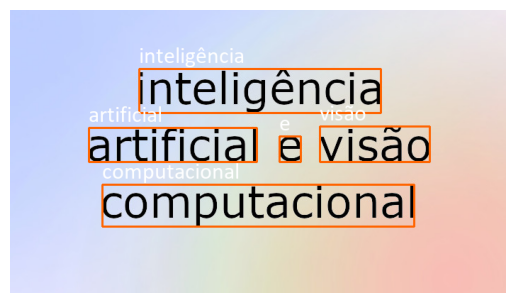

In [67]:
min_confidence = 40
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
  confidence = int(result['conf'][i])
  if confidence > min_confidence:
    x, y, img = bouding_box(result, img_copy, i)
    text = result['text'][i]
    #cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
    img_copy = write_text(text, x, y, img_copy, font)
plt.axis(False)
plt.imshow(img_copy)

# Searching specific information

In [68]:
import re # regular expressions

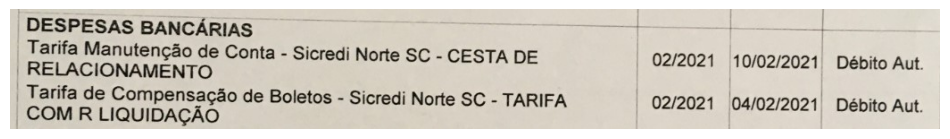

In [69]:
img = cv2.imread('Sources/Images/table_test.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.axis(False)
plt.imshow(rgb)

In [70]:
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
result

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  

In [71]:
# https://regexr.com/
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

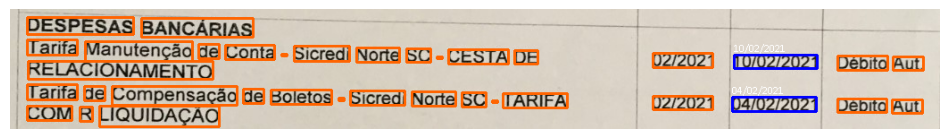

In [72]:
dates = []
min_confidence = 40
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
  confidence = int(result['conf'][i])
  if confidence > min_confidence:
    text = result['text'][i]
    if re.match(date_pattern, text):
      x, y, img = bouding_box(result, img_copy, i, (0,0,255))
      #cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
      img_copy = write_text(text, x, y, img_copy, font, 12)
      dates.append(text)
    else:
      x, y, img_copy = bouding_box(result, img_copy, i)
plt.figure(figsize=(12, 8))
plt.axis(False)
plt.imshow(img_copy)

In [73]:
dates

['10/02/2021', '04/02/2021']

# Detecting texts in natural scenarios

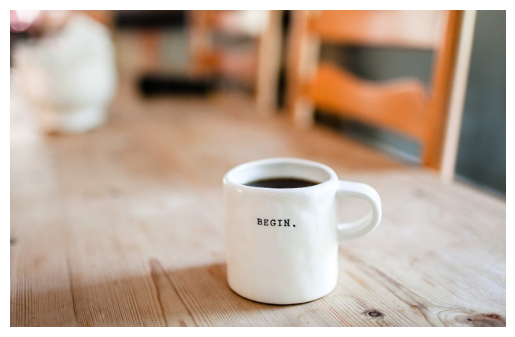

In [74]:
img = cv2.imread('Sources/Images/cup.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis(False)
plt.imshow(rgb)

In [79]:
config_tesseract = '--tessdata-dir tessdata --psm 12'
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang = 'eng', output_type=Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3],
 'par_num': [0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2],
 'left': [0, 0, 0, 0, 0, 145, 374, 374, 374, 374, 287, 287, 287, 287, 320],
 'top': [0, 0, 0, 0, 25, 0, 316, 316, 316, 316, 404, 404, 404, 444, 404],
 'width': [750,
  642,
  642,
  642,
  54,
  497,
  58,
  58,
  58,
  58,
  178,
  178,
  178,
  28,
  145],
 'height': [480, 161, 161, 161, 64, 161, 13, 13, 13, 13, 61, 61, 61, 21, 61],
 'conf': [-1, -1, -1, -1, 35, 37, -1, -1, -1, 87, -1, -1, -1, 39, 2],
 'text': ['',
  '',
  '',
  '',
  'T',
  '-',
  '',
  '',
  '',
  'BEGIN.',
  '',
  '',
  '',
  '|',
  '—-—']}

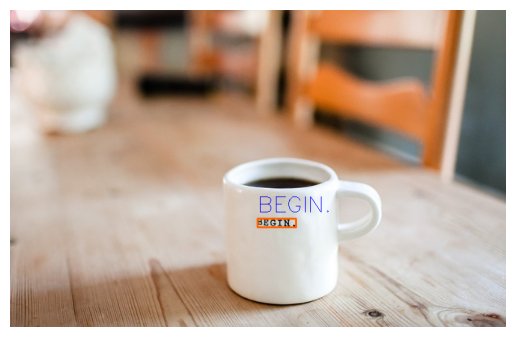

In [80]:
min_confidence = 40
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
  confidence = int(result['conf'][i])
  if confidence > min_confidence:
    text = result['text'][i]
    if not text.isspace() and len(text) > 0:
      x, y, img = bouding_box(result, img_copy, i)
      cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
plt.axis(False)
plt.imshow(img_copy)

In [81]:
result['conf']

[-1, -1, -1, -1, 35, 37, -1, -1, -1, 87, -1, -1, -1, 39, 2]

In [82]:
result['text']

['', '', '', '', 'T', '-', '', '', '', 'BEGIN.', '', '', '', '|', '—-—']

In [14]:
!wget -O ./tessdata/chi_tra.traineddata https://github.com/tesseract-ocr/tessdata/raw/main/chi_tra.traineddata

--2024-06-21 15:42:28--  https://github.com/tesseract-ocr/tessdata/raw/main/chi_tra.traineddata
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/chi_tra.traineddata [following]
--2024-06-21 15:42:28--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/chi_tra.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59025073 (56M) [application/octet-stream]
Saving to: ‘./tessdata/chi_tra.traineddata’

./tessdata/chi_tra. 100%[===================>]  56.29M  7.69MB/s    in 8.3s    

2024-06-21 15:42:36 (6.80 MB/s) - ‘./tessdata/chi_tra.traineddata’ save

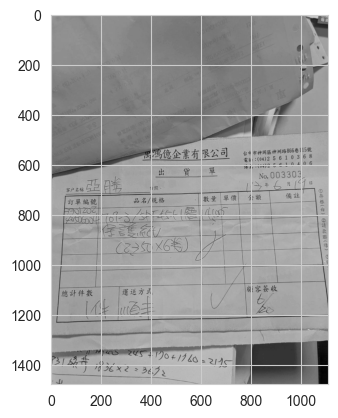

In [9]:
img = cv2.imread('Sources/Test/105588.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()


In [21]:
config_tesseract = '--tessdata-dir tessdata '
result = pytesseract.image_to_data(gray, lang='chi_tra', config=config_tesseract, output_type=Output.DICT)
result

{'level': [1,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
 

In [37]:
text = pytesseract.image_to_string(gray, lang='chi_tra', config=config_tesseract, output_type=Output.DICT)
print(text)

{'text': "ˊˋ﹔`槽'刁請暴寸'】橿︳匡癢‵ˍ'渟'︱】翩︱′】︴輻﹙殳夕售I1…﹜覆霜\n電 話 ﹕(04﹚2 5 6 1 0 3 6 8\n憮昱 傳 真 ﹕(04﹚2 5 6 1 0 4 0 6\n丞 曰拳 No﹒003303\n[ 2 ‵ 9\n\n品 名 / 規 格 2\n1 一 SFEtCrC 態 |[ 咚\n倉 棍 桃 ， |\n7250 X6 羚 ﹚\n\n十\n， ， 小 /74& S 抽\n\n《 _多霆夕乏\n\nE (熹€薴′﹚︴鬟拎溝蟲儡恿﹞ ( 眠 ﹚ 苓 斯 白\n"}


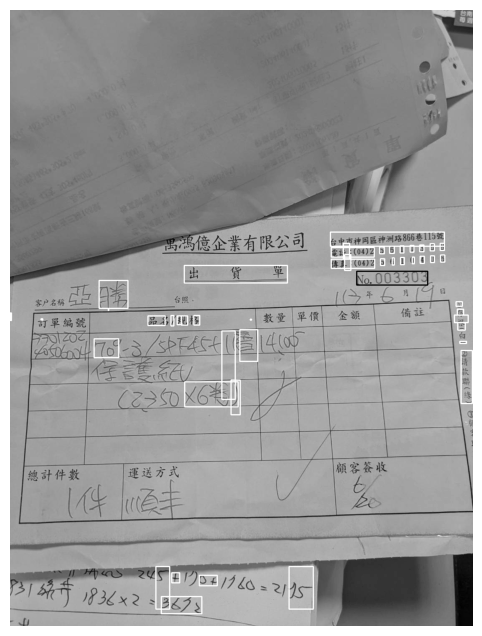

['No﹒003303']


In [44]:
import re
pattern = r'\b\d{6}\b'
digits = []
min_confidence = 40
gray_copy = gray.copy()
for i in range(0, len(result['text'])):
  confidence = int(result['conf'][i])
  if confidence > min_confidence:
    text = result['text'][i]
    if re.findall(pattern, text):
      x, y, img = bouding_box(result, gray_copy, i, (0,0,255))
      #cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
      img_copy = write_text(text, x, y, gray_copy, font, 12)
      digits.append(text)
    else:
      if text.strip():
        x, y, gray_copy = bouding_box(result, gray_copy, i)
plt.figure(figsize=(12, 8))
plt.axis(False)
plt.imshow(gray_copy, cmap='gray')
plt.show()

print(digits)